# IMPORTS

In [71]:
import pandas as pd
import os
from tabulate import tabulate

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# CONFIGURATION

In [10]:
CHUNK_SIZE = 500000

REVIEWS_FILE = 'data/original/yelp_dataset/yelp_academic_dataset_review.json'

# FONCTIONS

In [86]:
def preview(nrows) -> pd.DataFrame:
    df = pd.read_json(REVIEWS_FILE, lines=True, nrows=nrows)
    return df

def preprocess_text(text):
    # normalization
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stops Words
    stops = stopwords.words('english')
    tokens = [token for token in tokens if not token in stops]

    # Lematization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos='a') for word in tokens]
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    tokens = [lemmatizer.lemmatize(word, pos='n') for word in tokens]

    return ' '.join(tokens)
    
def preprocess_chunk(chunk: pd.DataFrame) -> pd.DataFrame:
    chunk = chunk.loc[:, ['stars', 'text']]
    chunk['class'] = chunk['stars'] > 3
    chunk.drop(columns=['stars'], inplace=True)
    chunk['text'] = chunk['text'].apply(preprocess_text)
    return chunk

In [23]:
preview_df = preview(10000)
display(preview_df.head())
display(preview_df.sample(10))

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2015,RfJb17pTVDgei-X2FG3xZA,MhbjMiuR74hpqgrjdlZmoQ,TQloD2_k3J67Q1J_picgfw,1,0,0,0,Worst Wawa in the Tri-State area. Always full ...,2015-08-07 05:15:37
1630,wB8G76evnR9UsZXNCKeltg,zK-HYsRHsUrbhvWv6pq0Ew,fBCv5Euudl9VieR870gwNg,5,1,0,1,They have some ridiculous number of martinis f...,2008-04-29 20:56:14
8133,DQga1p2Bn-EpD-QDTXBzJg,41TYTuV87wmkLe-nrbwS3w,EtKSTHV5Qx_Q7Aur9o4kQQ,2,0,0,0,The only reason I am giving this place 2 stars...,2014-01-18 19:27:18
7909,6gYb-EoKxbBKWzSmzk2sjw,URXhuvYnM0ZhS0T9oN6JvA,JUlsvVAvZvGHWFfkKm0nlg,5,0,0,0,"As a place super close to the Piazza, it doesn...",2013-03-19 04:02:11
6892,rjJI826pEmNBtF8Mbl8wTA,5bk50lYWFaq0tMC9drPYzA,zbvu8pRKcOQqdjqRGbncyQ,5,0,0,0,"Great food, great service, and great price!!! ...",2015-09-24 01:15:08
7603,T6MIfM0YNw_jKY3hrH6ROA,ufuIdORrVFg5Yp2F4soemA,pym7c6ZFEtmoH16xN2ApBg,4,0,0,0,Original menu and great place to meet up. FYI ...,2015-05-27 19:25:32
9528,chECcLNHCh-945OBG66N1w,_aYlzYDheB1TMuh909eRRg,v7YRuZlPMwbi82q5I15few,1,0,0,0,Horrible! I heard good things about this salo...,2018-04-27 23:09:36
2636,4rab1QZpVwKSZoqBJE1XmA,9lKo6oqndsNKwolm9pfNAg,g04aAvgol7IW8buqSbT4xA,4,0,0,0,Great spot! Also has breakfast until 3 vs many...,2018-08-14 05:02:45
9100,F2-jOupF5GdwCChmv4h_0g,9EXq6EzMDHaJNxbDN4gVDg,9A1ve-8MfJcUcOGQYCLlKA,5,1,0,0,Had the best wings I've ever tasted! Not overl...,2016-11-22 02:23:34
5169,OzFKMgi1Re8ra7CEu1xTFA,vD_ZHw4_Kb7bztos6q2PyA,EP2jFD3aGoSBCWb7irY5-w,2,1,1,0,"Eh, don't believe the hype on this place, its ...",2012-03-01 23:45:13


<Axes: xlabel='stars'>

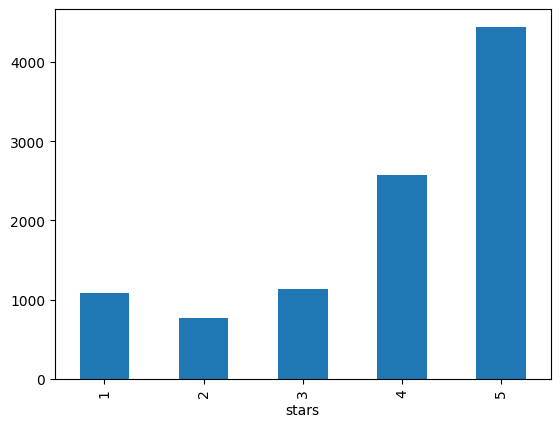

In [46]:
preview_df['stars'].value_counts().sort_index().plot.bar()

In [54]:
for star in range(1,6):
    print(f'Note = {star}:\n=========\n')
    for index in preview_df[preview_df['stars']==star].sample(4, random_state=0).index:
        stars, text = preview_df.loc[index, ['stars', 'text']].values
        print(f'{text}\n\n')

Note = 1:

Would give zero stars if possible. Carries literally zero lefty golf clubs for juniors. Does this corrupt corporation think that it's okay to discriminate against 10% of the world population? I will, most definitely, never be returning to this store again. Also, Jared, the man who helped me, was an absolute asshole. Would not recommend at all. Didn't even have bike parking.


I got some friends a room at the JW for the night as a gift the night of their wedding.  The only request I made of the front desk was that the bride and groom would not have to worry about any expenses.  2 of us separately went down and gave credit cards to the front desk to make sure everything was taken care of.  I got a phone call at 11:30 that night from the bride and groom saying that they were being asked to pay for parking.  Huge fail JW.  When I asked to talk to the manager, all he did was make excuses.  No apologies, no reassurance that they would be well taken care of for the rest of their st

In [87]:
preview_preprocessed = preprocess_chunk(preview_df)
preview_preprocessed.head()

,text,class
0,"decide eat , aware go take 2 hour begin end . ...",False
1,"'ve take lot spin class year , nothing compare...",True
2,family diner . buffet . eclectic assortment : ...,False
3,"wow ! yummy , different , delicious . favorite...",True
4,cute interior owner ( ? ) give u tour upcoming...,True


In [ ]:
for chunk in pd.read_json(REVIEWS_FILE, lines=True, chunksize=CHUNK_SIZE):
    chunk = chunk.loc[:, ['stars', 'text']]
    display(chunk.head())
    #chunk = preprocess_chunk(chunk)